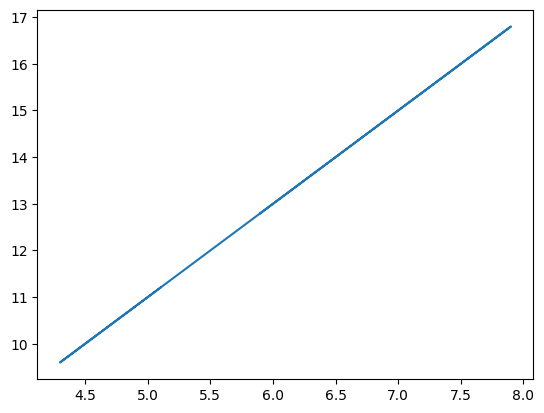

In [5]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris=load_iris()
iris = pd.DataFrame(iris.data, columns = iris.feature_names)
iris['class'] = load_iris().target
iris['class'] = iris['class'].map({0: 'Setosa', 1: 'Versicolor', 2:'Virginica'})

def linear_func(x):
    return 2*x +1

X = iris['sepal length (cm)']
plt.plot(X, linear_func(X))
plt.show()

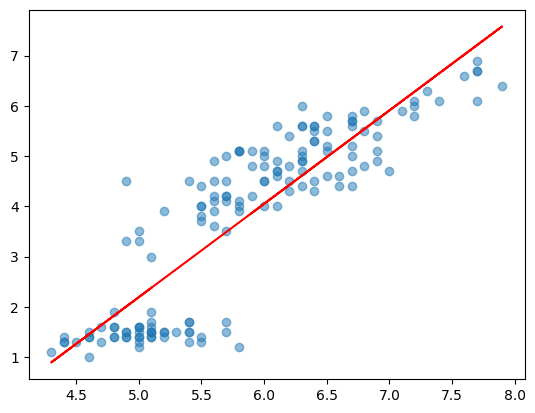

In [7]:
import numpy as np

X, Y = iris['sepal length (cm)'], iris['petal length (cm)']
b1, b0 = np.polyfit(X, Y, 1)
plt.scatter(x=X, y=Y, alpha=0.5)
plt.plot(X, b1*X+b0, c='r')
plt.show()

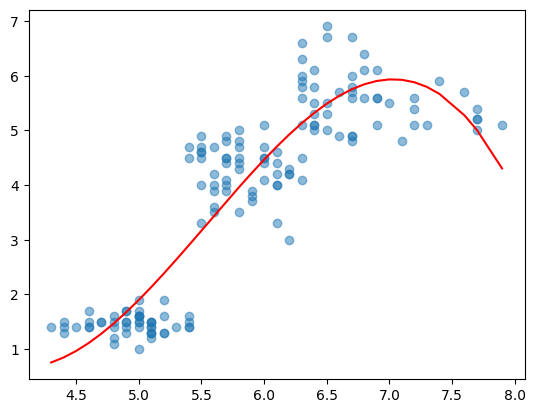

In [27]:
X = X.sort_values()
b3, b2, b1, b0 = np.polyfit(X, Y, 3)

def poly_func(X):
    return b0 + b1 * X + b2 * X ** 2 + b3 * X ** 3
    
plt.scatter(X, Y, alpha=0.5)
plt.plot(X, poly_func(X), color='red')
plt.show()

<Figure size 400x400 with 0 Axes>

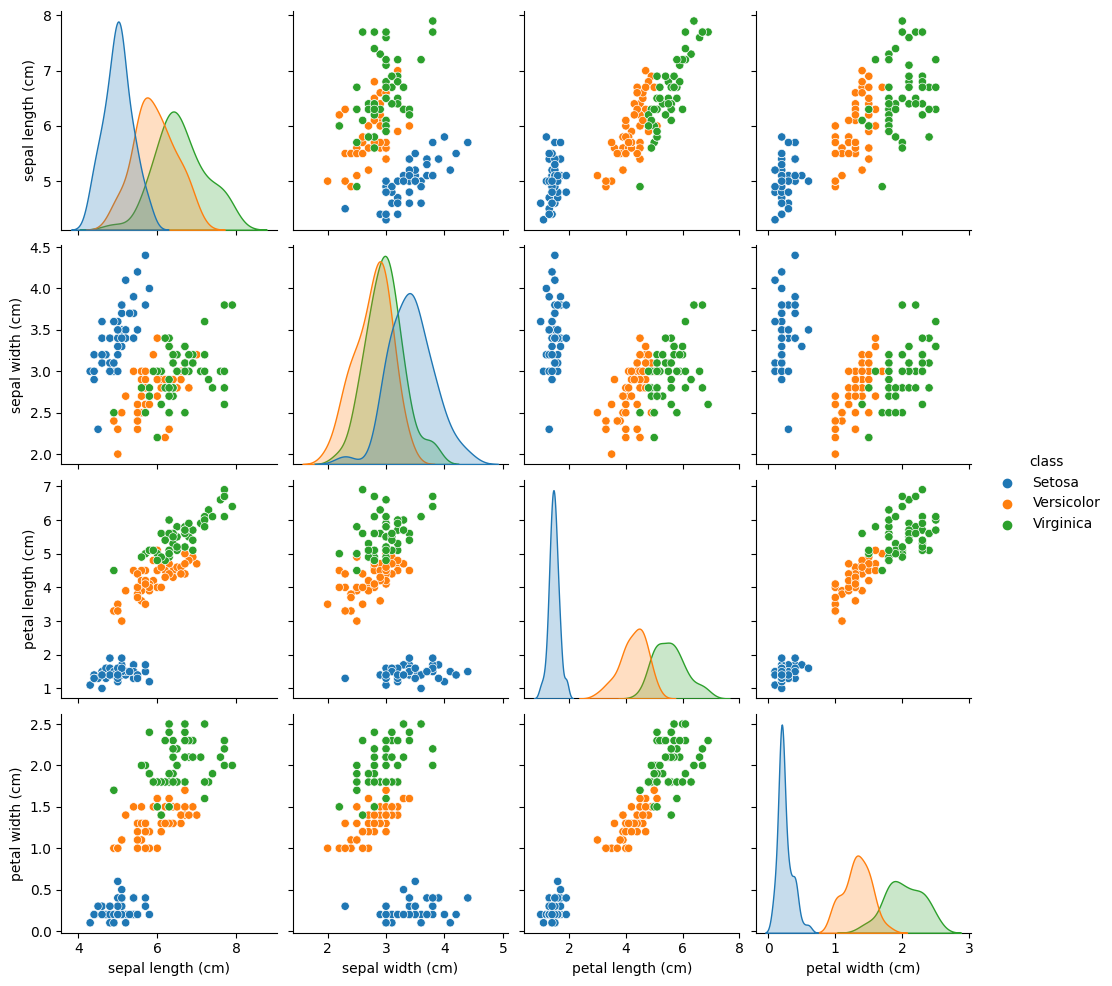

In [32]:
import seaborn as sns
plt.figure(figsize=(4, 4))
sns.pairplot(iris, diag_kind='auto', hue='class')
plt.show()

In [ ]:
from ydata_profiling import ProfileReport

ProfileReport(iris)

In [41]:
iris['cate'] = pd.qcut(iris['sepal width (cm)'], 3, labels=['small', 'medium', 'long'])

In [46]:
pd.get_dummies(iris, columns=['cate'])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class,cate_small,cate_medium,cate_long
0,5.1,3.5,1.4,0.2,Setosa,0,0,1
1,4.9,3.0,1.4,0.2,Setosa,0,1,0
2,4.7,3.2,1.3,0.2,Setosa,0,1,0
3,4.6,3.1,1.5,0.2,Setosa,0,1,0
4,5.0,3.6,1.4,0.2,Setosa,0,0,1
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica,0,1,0
146,6.3,2.5,5.0,1.9,Virginica,1,0,0
147,6.5,3.0,5.2,2.0,Virginica,0,1,0
148,6.2,3.4,5.4,2.3,Virginica,0,0,1


In [63]:
from sklearn.preprocessing import StandardScaler

X = iris.iloc[:, :4]

scaler = StandardScaler()
x = scaler.fit_transform(X)

pd.DataFrame(x)

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [64]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca_fit = pca.fit(x)

print(pca.singular_values_)
print(pca.explained_variance_ratio_)

[20.92306556 11.7091661   4.69185798  1.76273239]
[0.72962445 0.22850762 0.03668922 0.00517871]


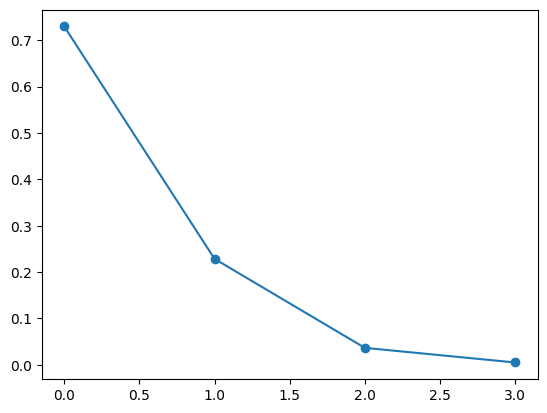

In [65]:
plt.plot(pca.explained_variance_ratio_, 'o-')

In [67]:
pca = PCA(n_components=2)
pca_fit = pca.fit_transform(x)

df = pd.DataFrame(pca_fit, columns=['pc1', 'pc2'])

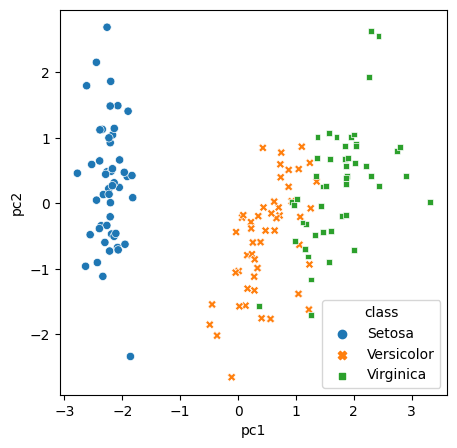

In [94]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x='pc1', y='pc2', data=df, hue=iris['class'], style=iris['class'])
plt.show()

In [70]:
p = np.polyfit(df['pc1'], df['pc2'], 1)

In [77]:
np.array([df['pc1'].min(), df['pc1'].max()]) * p[0] + p[1]

array([-2.81877956e-16,  6.54489626e-16])

In [97]:
x_pc = np.array([df['pc1'].min(), df['pc1'].max()])
y_pc = x_pc * p[0] + p[1]

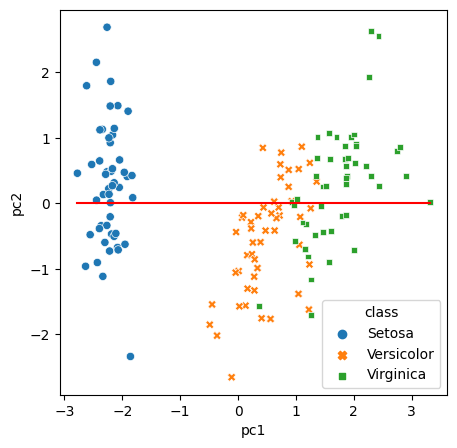

In [98]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x='pc1', y='pc2', data=df, hue=iris['class'], style=iris['class'])
plt.plot(x_pc, y_pc, color='red')
plt.show()